## EDA on Course-Level Data
Vincent Etherton

Advisor: Dr. Xiaoyan Li

Data obtained by datagolf API

In [4]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
course_df = pd.read_csv('dg_course_table.csv')

In [6]:
course_df.head()

,course,par,yardage,yardage_4_5,yardage_3,adj_score_to_par,adj_par_3_score,adj_par_4_score,adj_par_5_score,adj_driving_distance,...,less_150_sg,greater_150_sg,adj_penalties,adj_ob,arg_fairway_sg,arg_rough_sg,arg_bunker_sg,less_5_ft_sg,greater_5_less_15_sg,greater_15_sg
0,Castle Pines Golf Club,72,7981,511,208,0.38,0.09,0.13,-0.33,323.2,...,-0.078,0.030,0.69,0.14,0.003,-0.120,-0.017,0.005,-0.003,0.017
1,Ocean Course at Kiawah Island,72,7671,489,207,2.57,0.29,0.21,-0.17,293.0,...,-0.089,-0.044,0.65,0.08,-0.007,-0.040,-0.288,-0.007,-0.012,0.004
2,Torrey Pines South (U.S. Open),71,7635,490,194,2.57,0.18,0.20,-0.12,300.8,...,-0.049,-0.017,0.15,0.01,0.005,-0.034,-0.021,-0.005,-0.025,-0.019
3,Torrey Pines South (Genesis Inv.),72,7599,488,190,1.11,0.12,0.17,-0.26,290.9,...,0.009,0.002,0.29,0.04,0.068,0.022,0.058,-0.015,-0.065,-0.011
4,Torrey Pines Golf Course (South Course),72,7589,487,194,1.18,0.10,0.17,-0.24,289.7,...,-0.011,0.005,0.19,0.02,0.026,-0.011,-0.002,-0.013,-0.047,-0.008


In [7]:
course_df.columns

Index(['course', 'par', 'yardage', 'yardage_4_5', 'yardage_3',
       'adj_score_to_par', 'adj_par_3_score', 'adj_par_4_score',
       'adj_par_5_score', 'adj_driving_distance', 'adj_sd_distance',
       'adj_driving_accuracy', 'putt_sg', 'arg_sg', 'app_sg', 'ott_sg',
       'fw_width', 'fw_diff', 'rgh_diff', 'non_rgh_diff', 'miss_fw_pen_frac',
       'adj_gir', 'less_150_sg', 'greater_150_sg', 'adj_penalties', 'adj_ob',
       'arg_fairway_sg', 'arg_rough_sg', 'arg_bunker_sg', 'less_5_ft_sg',
       'greater_5_less_15_sg', 'greater_15_sg'],
      dtype='object')

In [8]:
course_df.describe()

,par,yardage,yardage_4_5,yardage_3,adj_score_to_par,adj_par_3_score,adj_par_4_score,adj_par_5_score,adj_driving_distance,adj_sd_distance,...,less_150_sg,greater_150_sg,adj_penalties,adj_ob,arg_fairway_sg,arg_rough_sg,arg_bunker_sg,less_5_ft_sg,greater_5_less_15_sg,greater_15_sg
count,105.000000,105.000000,105.00000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,...,105.000000,105.000000,105.000000,105.000000,105.000000,104.000000,105.000000,105.000000,105.000000,105.000000
mean,71.019048,7228.742857,463.32381,190.723810,-0.000476,0.080952,0.061333,-0.324857,289.405714,18.601905,...,-0.004676,0.004886,0.368952,0.056952,0.000390,-0.005548,-0.018257,-0.000476,0.000152,-0.001352
std,0.831830,198.311431,13.92804,10.568909,1.544786,0.079560,0.083379,0.131713,8.502520,2.227321,...,0.037306,0.035390,0.217980,0.048340,0.034938,0.055555,0.068808,0.005805,0.024036,0.016098
min,70.000000,6800.000000,430.00000,167.000000,-3.190000,-0.120000,-0.090000,-0.650000,270.200000,14.800000,...,-0.089000,-0.074000,0.030000,0.000000,-0.112000,-0.221000,-0.348000,-0.024000,-0.078000,-0.058000
25%,70.000000,7094.000000,453.00000,184.000000,-1.150000,0.020000,0.000000,-0.410000,282.900000,17.200000,...,-0.034000,-0.021000,0.200000,0.020000,-0.018000,-0.040000,-0.041000,-0.003000,-0.012000,-0.012000
50%,71.000000,7248.000000,464.00000,190.000000,0.030000,0.070000,0.050000,-0.330000,288.600000,18.200000,...,0.001000,0.007000,0.340000,0.040000,0.004000,-0.007500,-0.005000,0.000000,0.002000,0.002000
75%,72.000000,7339.000000,471.00000,197.000000,0.960000,0.120000,0.120000,-0.240000,295.000000,19.700000,...,0.017000,0.027000,0.510000,0.070000,0.024000,0.028250,0.019000,0.003000,0.015000,0.010000
max,73.000000,7981.000000,511.00000,223.000000,4.450000,0.290000,0.290000,0.010000,323.200000,27.500000,...,0.093000,0.082000,0.920000,0.220000,0.072000,0.108000,0.107000,0.011000,0.085000,0.033000


In [9]:
course_df.shape

(105, 32)

In [10]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   course                105 non-null    object 
 1   par                   105 non-null    int64  
 2   yardage               105 non-null    int64  
 3   yardage_4_5           105 non-null    int64  
 4   yardage_3             105 non-null    int64  
 5   adj_score_to_par      105 non-null    float64
 6   adj_par_3_score       105 non-null    float64
 7   adj_par_4_score       105 non-null    float64
 8   adj_par_5_score       105 non-null    float64
 9   adj_driving_distance  105 non-null    float64
 10  adj_sd_distance       105 non-null    float64
 11  adj_driving_accuracy  105 non-null    float64
 12  putt_sg               105 non-null    float64
 13  arg_sg                105 non-null    float64
 14  app_sg                105 non-null    float64
 15  ott_sg                1

In [11]:
print(course_df[course_df.isnull().any(axis=1)].to_string())

                                               course  par  yardage  yardage_4_5  yardage_3  adj_score_to_par  adj_par_3_score  adj_par_4_score  adj_par_5_score  adj_driving_distance  adj_sd_distance  adj_driving_accuracy  putt_sg  arg_sg  app_sg  ott_sg  fw_width  fw_diff  rgh_diff  non_rgh_diff  miss_fw_pen_frac  adj_gir  less_150_sg  greater_150_sg  adj_penalties  adj_ob  arg_fairway_sg  arg_rough_sg  arg_bunker_sg  less_5_ft_sg  greater_5_less_15_sg  greater_15_sg
6  Pinehurst Resort &amp; Country Club (Course No. 2)   70     7513          480        201              3.09             0.25              0.2            -0.15                 294.7             18.2                0.6685   -0.006  -0.087  -0.028   0.037      35.0     0.39       NaN          0.37            0.0042   0.5317       -0.045          -0.023           0.03    0.01          -0.112           NaN         -0.042         0.001                -0.011         -0.014


In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)
df2 = pd.DataFrame(imputer.fit_transform(course_df.drop(columns=["course"])), columns=course_df.drop(columns=["course"]).columns)
course_df = pd.concat([df2, course_df["course"]], axis=1)

# citation: https://scikit-learn.org/stable/modules/impute.html#univariate-vs-multivariate-imputation

In [13]:
print(course_df[course_df.isnull().any(axis=1)].to_string())

Empty DataFrame
Columns: [par, yardage, yardage_4_5, yardage_3, adj_score_to_par, adj_par_3_score, adj_par_4_score, adj_par_5_score, adj_driving_distance, adj_sd_distance, adj_driving_accuracy, putt_sg, arg_sg, app_sg, ott_sg, fw_width, fw_diff, rgh_diff, non_rgh_diff, miss_fw_pen_frac, adj_gir, less_150_sg, greater_150_sg, adj_penalties, adj_ob, arg_fairway_sg, arg_rough_sg, arg_bunker_sg, less_5_ft_sg, greater_5_less_15_sg, greater_15_sg, course]
Index: []


In [14]:
sg_cols = [col for col in course_df.columns if col.endswith("_sg")]
yardage_cols = [col for col in course_df.columns if col.startswith("yardage")]
score_cols = [col for col in course_df.columns if "score" in col]
fairway_cols = [col for col in course_df.columns if "fw" in col or "rgh" in col]
penalty_cols = [col for col in course_df.columns if "penalties" in col or "ob" in col]


In [15]:
print(course_df[course_df.course=="Pinehurst Resort &amp; Country Club (Course No. 2)"].to_string())

    par  yardage  yardage_4_5  yardage_3  adj_score_to_par  adj_par_3_score  adj_par_4_score  adj_par_5_score  adj_driving_distance  adj_sd_distance  adj_driving_accuracy  putt_sg  arg_sg  app_sg  ott_sg  fw_width  fw_diff  rgh_diff  non_rgh_diff  miss_fw_pen_frac  adj_gir  less_150_sg  greater_150_sg  adj_penalties  adj_ob  arg_fairway_sg  arg_rough_sg  arg_bunker_sg  less_5_ft_sg  greater_5_less_15_sg  greater_15_sg                                              course
6  70.0   7513.0        480.0      201.0              3.09             0.25              0.2            -0.15                 294.7             18.2                0.6685   -0.006  -0.087  -0.028   0.037      35.0     0.39  0.322552          0.37            0.0042   0.5317       -0.045          -0.023           0.03    0.01          -0.112     -0.076648         -0.042         0.001                -0.011         -0.014  Pinehurst Resort &amp; Country Club (Course No. 2)


In [16]:
print(course_df.course.to_string())

0                                 Castle Pines Golf Club
1                          Ocean Course at Kiawah Island
2                         Torrey Pines South (U.S. Open)
3                      Torrey Pines South (Genesis Inv.)
4                Torrey Pines Golf Course (South Course)
5                   Quail Hollow Club (PGA Championship)
6      Pinehurst Resort &amp; Country Club (Course No...
7                             Augusta National Golf Club
8                                       Crooked Stick GC
9                           Medinah Country Club (No. 3)
10                                  Trump National Doral
11                                Caves Valley Golf Club
12                               Wilmington Country Club
13                                     Quail Hollow Club
14                           Southern Hills Country Club
15                               Congressional CC (Blue)
16                                    Valhalla Golf Club
17                             

In [17]:
course_df["course"] = course_df["course"].str.replace("&amp;", "&")
course_df["course"] = course_df["course"].str.replace(" (Par 71)", "")

In [18]:
print(course_df.course.to_string())

0                                 Castle Pines Golf Club
1                          Ocean Course at Kiawah Island
2                         Torrey Pines South (U.S. Open)
3                      Torrey Pines South (Genesis Inv.)
4                Torrey Pines Golf Course (South Course)
5                   Quail Hollow Club (PGA Championship)
6         Pinehurst Resort & Country Club (Course No. 2)
7                             Augusta National Golf Club
8                                       Crooked Stick GC
9                           Medinah Country Club (No. 3)
10                                  Trump National Doral
11                                Caves Valley Golf Club
12                               Wilmington Country Club
13                                     Quail Hollow Club
14                           Southern Hills Country Club
15                               Congressional CC (Blue)
16                                    Valhalla Golf Club
17                             

In [19]:
country_map = {
    "Royal Troon": "Scotland",
    "St. Andrews Links (Old Course)": "Scotland",
    "Royal Liverpool": "England",
    "Royal Portrush Golf Club": "Northern Ireland",
    "The Renaissance Club": "Scotland",
    "Le Golf National": "France",
    "ACCORDIA GOLF Narashino Country Club": "Japan",
    "Club de Golf Chapultepec": "Mexico",
    "Vidanta Vallarta": "Mexico",
    "Albany GC": "Bahamas",
    "Royal Montreal GC (Blue)": "Canada",
    "St. George's G&CC": "Canada",
    "Hamilton Golf & Country Club": "Canada",
    "TPC Toronto at Osprey Valley (North Course)": "Canada",
    "Glen Abbey GC": "Canada",
}

course_df["country"] = course_df["course"].map(country_map).fillna("USA")

In [20]:
print(course_df.country.to_string())

0                   USA
1                   USA
2                   USA
3                   USA
4                   USA
5                   USA
6                   USA
7                   USA
8                   USA
9                   USA
10                  USA
11                  USA
12                  USA
13                  USA
14                  USA
15                  USA
16                  USA
17                  USA
18                  USA
19                  USA
20                  USA
21                  USA
22                  USA
23                  USA
24                  USA
25                  USA
26                  USA
27                  USA
28               Mexico
29                  USA
30                  USA
31                  USA
32                  USA
33             Scotland
34     Northern Ireland
35                  USA
36              Bahamas
37                  USA
38                  USA
39                  USA
40                  USA
41              

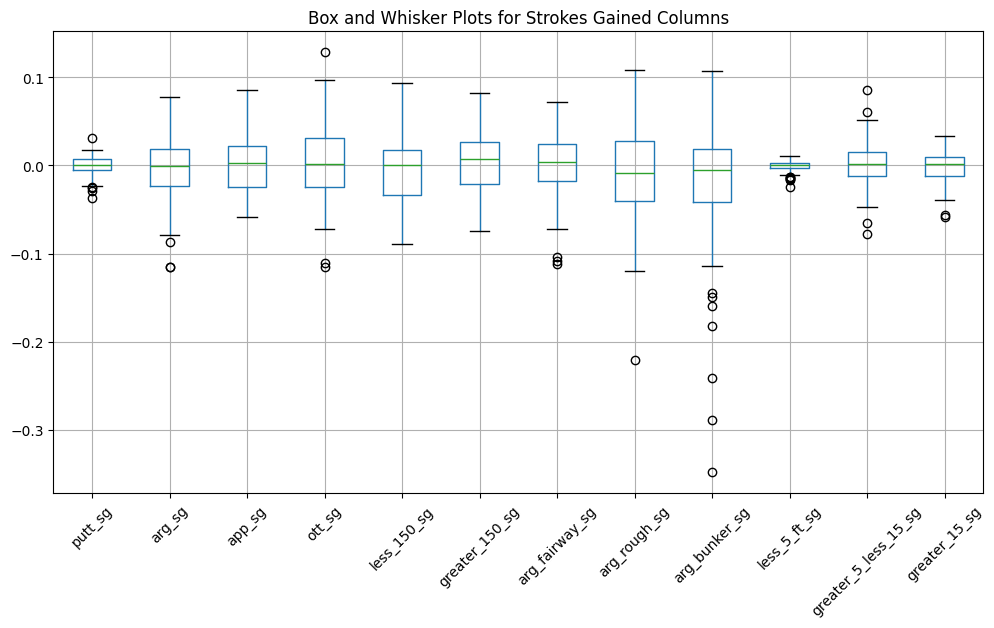

In [21]:
import matplotlib.pyplot as plt
course_df[sg_cols].boxplot(figsize=(12,6))
plt.xticks(rotation=45)  # rotate labels for readability
plt.title("Box and Whisker Plots for Strokes Gained Columns")
plt.show()

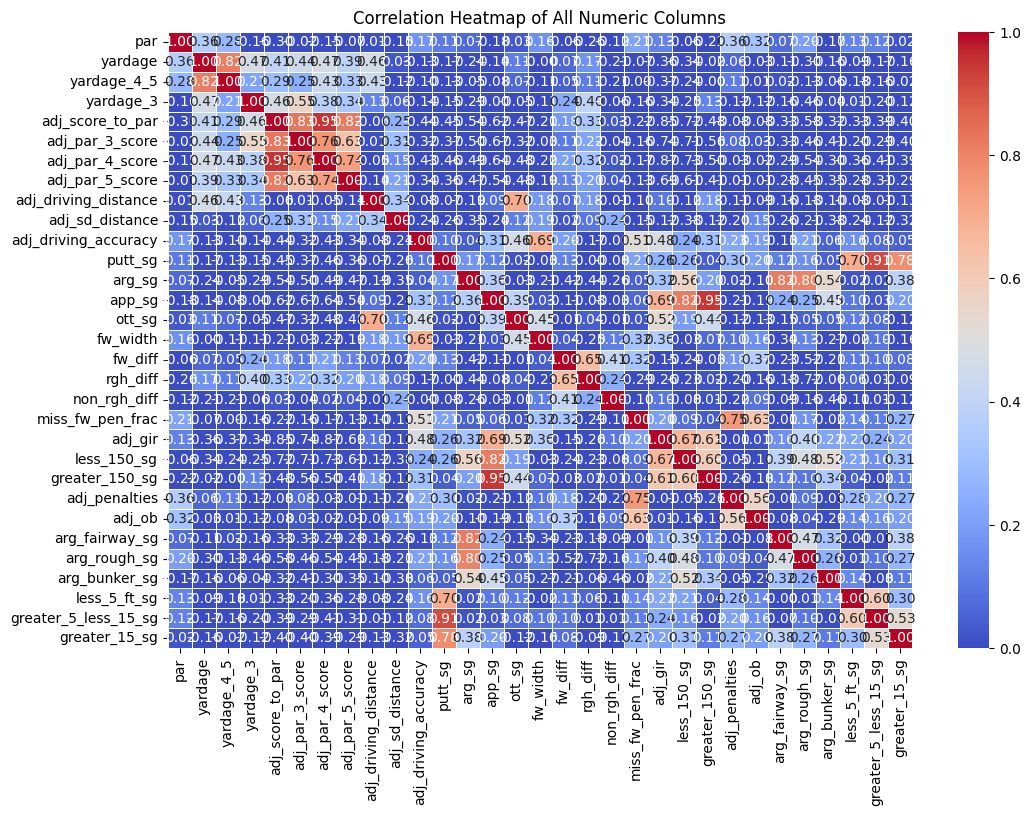

In [22]:
corr = course_df.corr(numeric_only=True)

# Make heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=0, vmax=1)
plt.title("Correlation Heatmap of All Numeric Columns")
plt.show()

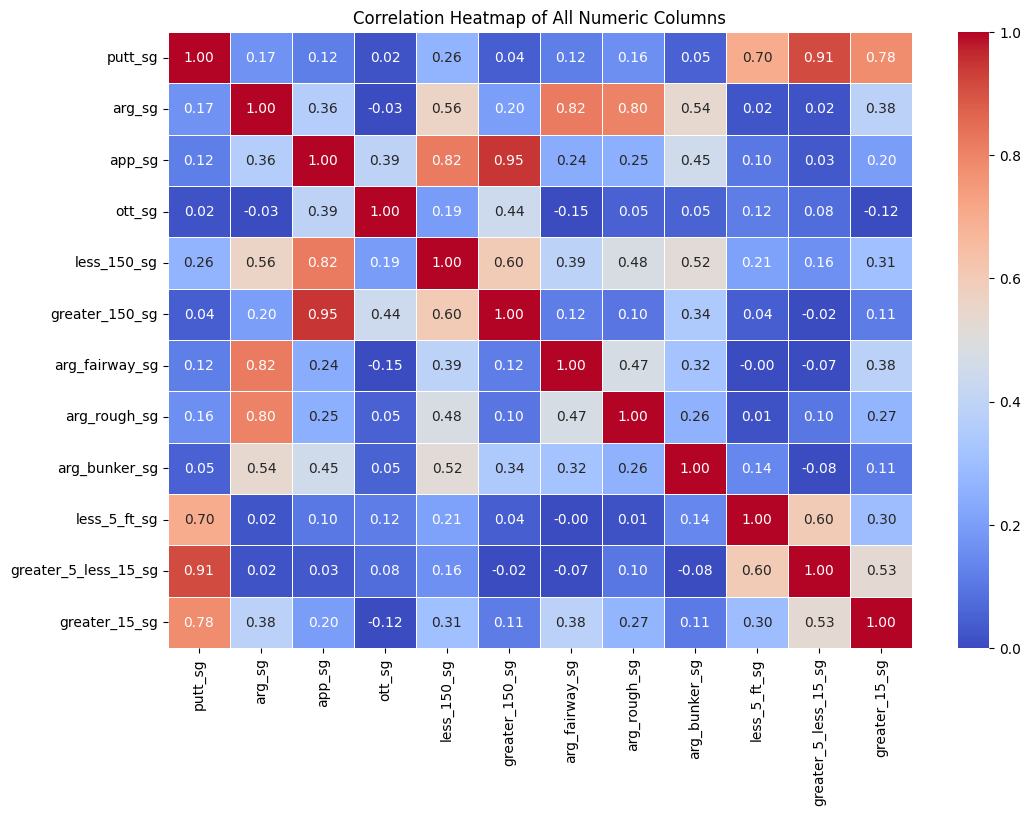

In [23]:
corr = course_df[sg_cols].corr()

# Make heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=0, vmax=1)
plt.title("Correlation Heatmap of All Numeric Columns")
plt.show()


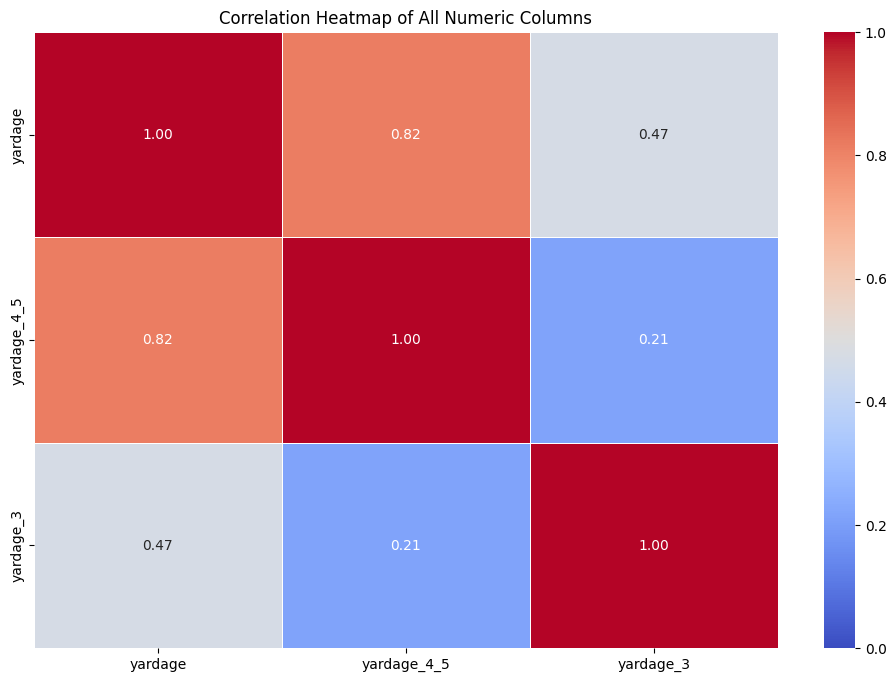

In [24]:
corr = course_df[yardage_cols].corr()

# Make heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=0, vmax=1)
plt.title("Correlation Heatmap of All Numeric Columns")
plt.show()

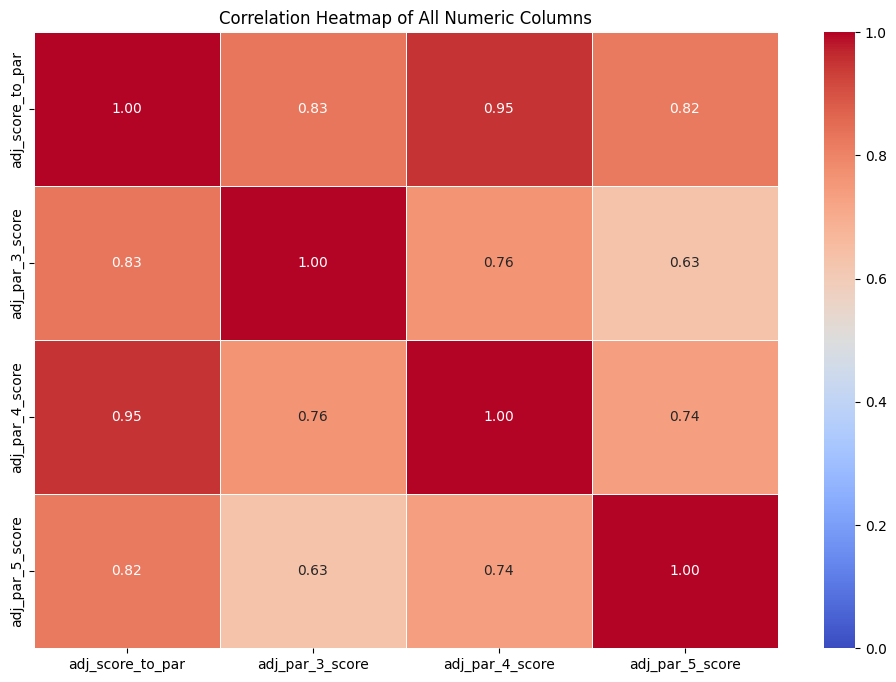

In [25]:
corr = course_df[score_cols].corr()

# Make heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Correlation Heatmap of All Numeric Columns")
plt.show()

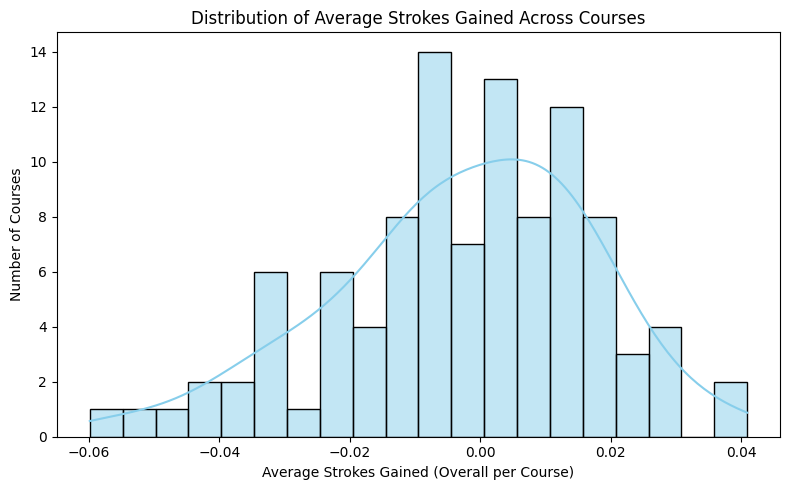

In [ ]:
course_means = course_df.groupby("course")[sg_cols].mean()

course_means["overall_sg"] = course_means.mean(axis=1)

plt.figure(figsize=(8,5))
sns.histplot(course_means["overall_sg"], bins=20, kde=True, color="skyblue", edgecolor="black")
plt.xlabel("Average Strokes Gained (Overall per Course)")
plt.ylabel("Number of Courses")
plt.title("Distribution of Average Strokes Gained Across Courses")
plt.tight_layout()
plt.show()

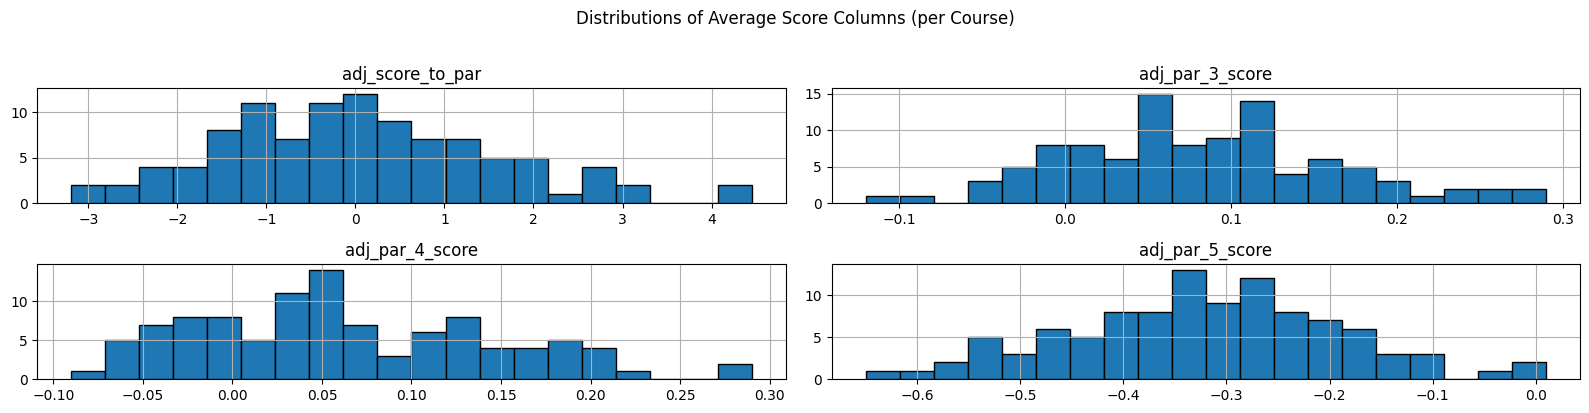

In [ ]:
course_means = course_df.groupby("course")[score_cols].mean()

course_means[score_cols].hist(
    bins=20, figsize=(4*len(score_cols), 4), edgecolor="black"
)

plt.suptitle("Distributions of Average Score Columns (per Course)", y=1.02)
plt.tight_layout()
plt.show()

In [28]:
course_df.to_csv('cleaned_course_data.csv', index=False)